In [ ]:
#https://towardsdatascience.com/pytorch-basics-how-to-train-your-neural-net-intro-to-cnn-26a14c2ea29
#https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=convolution

In [2]:
import numpy as np
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
import pandas as pd
import numpy as np
from skimage.io import imread
%matplotlib inline

In [2]:
cnn1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1)

In [3]:
cnn1d

Conv1d(1, 1, kernel_size=(3,), stride=(1,))

In [4]:
input_1d = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype = torch.float)

In [5]:
print(input_1d)
print(input_1d.size())

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
torch.Size([10])


In [6]:
#cnn1d(input_1d) # - Error!!

In [7]:
input_1d = input_1d.unsqueeze(0).unsqueeze(0)

In [8]:
print(input_1d)
print(input_1d.size())

tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]])
torch.Size([1, 1, 10])


In [9]:
tmp = cnn1d(input_1d)

print(tmp)
print(tmp.size())

tensor([[[1.5389, 2.3027, 3.0666, 3.8305, 4.5944, 5.3582, 6.1221, 6.8860]]],
       grad_fn=<SqueezeBackward1>)
torch.Size([1, 1, 8])


In [10]:
cnn1d_2 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=2)

In [11]:
tmp = cnn1d_2(input_1d)
print(tmp)
print(tmp.size())

tensor([[[-0.9441, -2.1294, -3.3148, -4.5001]]], grad_fn=<SqueezeBackward1>)
torch.Size([1, 1, 4])


In [57]:
input_2d_img = torch.tensor([[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]], dtype = torch.float)

In [58]:
print(input_2d_img.size())
print(input_2d_img)


torch.Size([3, 3, 10])
tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

        [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

        [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]])


In [59]:
input_2d_img = input_2d_img.unsqueeze(0)
print(input_2d_img.size())
print(input_2d_img)

torch.Size([1, 3, 3, 10])
tensor([[[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

         [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

         [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]]])


In [60]:
cnn2d_2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2)

In [61]:
tmp = cnn2d_2(input_2d_img)
print(tmp)
print(tmp.size())

tensor([[[[1.1283, 2.5457, 3.9630, 5.3804]]]],
       grad_fn=<MkldnnConvolutionBackward>)
torch.Size([1, 1, 1, 4])


In [82]:
input_2d_img.size()

torch.Size([1, 3, 3, 10])

______

Pytorch Convolution Neural Network

In [2]:
trainset = datasets.CIFAR10(root='./data', train=True,download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
bat1 = trainloader.dataset.data[0]
print(bat1)
print(type(bat1))

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
<class 'numpy.ndarray'>


In [4]:
 type(trainloader.dataset.data)

numpy.ndarray

In [5]:
tensor_data = torch.from_numpy(trainloader.dataset.data[0])

In [6]:
type(tensor_data)

torch.Tensor

In [7]:
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:
transform?

In [8]:
img = transform(trainloader.dataset.data[1])

In [9]:
img

tensor([[[ 0.2078, -0.0118, -0.1765,  ..., -0.2863, -0.3176, -0.3804],
         [ 0.0980,  0.1373, -0.0196,  ..., -0.2471, -0.3961, -0.4431],
         [ 0.0980,  0.0902, -0.0980,  ..., -0.3804, -0.4667, -0.4745],
         ...,
         [ 0.3725,  0.2235,  0.2078,  ..., -0.6706, -0.5216, -0.2706],
         [ 0.2941,  0.2235,  0.2471,  ..., -0.1922, -0.0353,  0.0275],
         [ 0.2784,  0.2392,  0.2784,  ...,  0.1216,  0.1216,  0.1216]],

        [[ 0.3882,  0.0745, -0.1843,  ..., -0.2549, -0.2941, -0.3647],
         [ 0.2549,  0.2000, -0.0196,  ..., -0.2235, -0.3725, -0.4275],
         [ 0.2157,  0.1451, -0.0980,  ..., -0.3569, -0.4510, -0.4588],
         ...,
         [ 0.3098,  0.2078,  0.2549,  ..., -0.7333, -0.5843, -0.3490],
         [ 0.2078,  0.1922,  0.2627,  ..., -0.2706, -0.1059, -0.0510],
         [ 0.1608,  0.1608,  0.2235,  ...,  0.0431,  0.0510,  0.0431]],

        [[ 0.4667,  0.0667, -0.2549,  ..., -0.4431, -0.4431, -0.4510],
         [ 0.3255,  0.2078, -0.0745,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


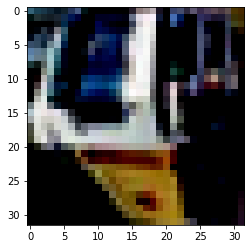

In [10]:
 plt.imshow(np.transpose(img.numpy()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


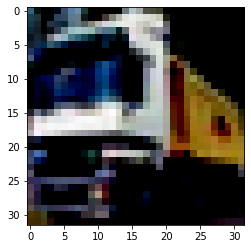

In [11]:
 plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

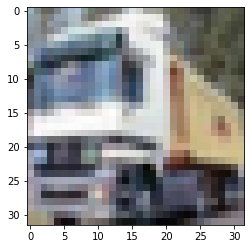

In [12]:
img = img / 2 + 0.5     # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

Transforming data on loading

In [3]:
transform = transforms.Compose( [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


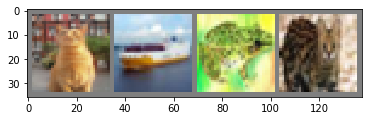

  cat  ship  frog   cat


In [4]:
# get some random training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [56]:
nn.Conv2d?

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.262
[1,  4000] loss: 1.931
[1,  6000] loss: 1.720
[1,  8000] loss: 1.596
[1, 10000] loss: 1.516
[1, 12000] loss: 1.467
[2,  2000] loss: 1.407
[2,  4000] loss: 1.363
[2,  6000] loss: 1.339
[2,  8000] loss: 1.338
[2, 10000] loss: 1.304
[2, 12000] loss: 1.286
Finished Training


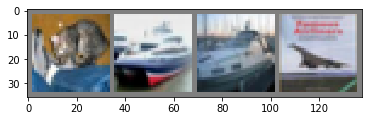

GroundTruth:    cat  ship  ship plane


In [7]:
PATH = 'cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 64 %
Accuracy of  bird : 56 %
Accuracy of   cat : 33 %
Accuracy of  deer : 44 %
Accuracy of   dog : 44 %
Accuracy of  frog : 54 %
Accuracy of horse : 52 %
Accuracy of  ship : 78 %
Accuracy of truck : 58 %


Fashion MNist ;https://towardsdatascience.com/build-a-fashion-mnist-cnn-pytorch-style-efb297e22582

In [9]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

# calculate train time, writing train data to files etc.
import time
import pandas as pd
import json
from IPython.display import clear_output

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)     # On by default, leave it here for clarity

In [10]:
# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

Extracting ./data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw


Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw


Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [12]:
# Build the neural network, expand on top of nn.Module
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

        # define forward function
    def forward(self, t):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
    
        # conv 2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
    
        # fc1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
    
        # fc2
        t = self.fc2(t)
        t = F.relu(t)
    
        # output
        t = self.out(t)
        # don't need softmax here since we'll use cross-entropy as activation.
    
        return t

In [16]:
from collections  import OrderedDict
from collections import namedtuple
from itertools import product
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.01, .001],
    batch_size = [100, 1000],
    shuffle = [True, False]
)
epochs = 3

In [18]:
# Read in the hyper-parameters and return a Run namedtuple containing all the 
# combinations of hyper-parameters
class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run', params.keys())

        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))
    
        return runs

In [19]:
# Helper class, help track loss, accuracy, epoch time, run time, 
# hyper-parameters etc. Also record to TensorBoard and write into csv, json
class RunManager():
    def __init__(self):
        # tracking every epoch count, loss, accuracy, time
        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        # tracking every run count, run data, hyper-params used, time
        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        # record model, loader and TensorBoard 
        self.network = None
        self.loader = None
        self.tb = None

    # record the count, hyper-param, model, loader of each run
    # record sample images and network graph to TensorBoard  
    def begin_run(self, run, network, loader):
        self.run_start_time = time.time()
  
        self.run_params = run
        self.run_count += 1
  
        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f'-{run}')
  
        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)
  
        self.tb.add_image('images', grid)
        self.tb.add_graph(self.network, images)

    # when run ends, close TensorBoard, zero epoch count
    def end_run(self):
        self.tb.close()
        self.epoch_count = 0

    # zero epoch count, loss, accuracy, 
    def begin_epoch(self):
        self.epoch_start_time = time.time()
  
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0

    def end_epoch(self):
        # calculate epoch duration and run duration(accumulate)
        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time
  
        # record epoch loss and accuracy
        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)
  
        # Record epoch loss and accuracy to TensorBoard 
        self.tb.add_scalar('Loss', loss, self.epoch_count)
        self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)
  
        # Record params to TensorBoard
        for name, param in self.network.named_parameters():
            self.tb.add_histogram(name, param, self.epoch_count)
            self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
        
        # Write into 'results' (OrderedDict) for all run related data
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results["loss"] = loss
        results["accuracy"] = accuracy
        results["epoch duration"] = epoch_duration
        results["run duration"] = run_duration
  
        # Record hyper-params into 'results'
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient = 'columns')
  
        # display epoch information and show progress
        clear_output(wait=True)
        display(df)

    # accumulate loss of batch into entire epoch loss
    def track_loss(self, loss):
       # multiply batch size so variety of batch sizes can be compared
       self.epoch_loss += loss.item() * self.loader.batch_size

    # accumulate number of corrects of batch into entire epoch num_correct
    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)

    @torch.no_grad()
    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()
    
    # save end results of all runs into csv, json for further analysis
    def save(self, fileName):
        pd.DataFrame.from_dict(
            self.run_data, orient = 'columns').to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [ ]:
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):
    

    # if params changes, following line of code should reflect the changes too
    network = Network()
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in loader:
          
          images = batch[0]
          labels = batch[1]
          preds = network(images)
          loss = F.cross_entropy(preds, labels)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          m.track_loss(loss)
          m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle
0,1,1,0.594666,0.775100,19.686299,37.495657,0.010,100,True
1,1,2,0.417843,0.845483,19.609595,57.451327,0.010,100,True
2,1,3,0.380026,0.859167,19.968092,77.572010,0.010,100,True
3,2,1,0.595224,0.774817,19.315319,19.550632,0.010,100,False
4,2,2,0.411071,0.847033,19.739229,39.431482,0.010,100,False
5,2,3,0.367928,0.863400,19.890779,59.477844,0.010,100,False
6,3,1,1.025039,0.601017,16.145799,17.066336,0.010,1000,True
7,3,2,0.556087,0.781217,16.136827,33.353760,0.010,1000,True
8,3,3,0.471034,0.821800,16.720261,50.243567,0.010,1000,True
9,4,1,0.995544,0.617150,16.278894,17.315122,0.010,1000,False
